In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df_i = pd.read_csv('results_i.csv')
df_s = pd.read_csv('results_s.csv')

In [114]:
df_Am = df_s[(df_s['num_s'] == df_s['num_s'].max()) & (df_s['s_method'] == 'Orthogonal Sampling')]
Am = df_Am['area'].mean()

df_i['abs_diff'] = abs(Am - df_i['area'])
df_s['abs_diff'] = abs(Am - df_s['area'])

Am

1.5323282498184458

In [115]:
print(df_i.head())
print(df_s.head())

   iteration  area  repetition     s_method  abs_diff
0          6  2.60           1  Monte Carlo  1.067672
1          7  2.28           1  Monte Carlo  0.747672
2          8  1.92           1  Monte Carlo  0.387672
3          9  2.04           1  Monte Carlo  0.507672
4         10  1.92           1  Monte Carlo  0.387672
   num_s      area  repetition     s_method  abs_diff
0    100  1.600000           1  Monte Carlo  0.067672
1    121  1.322314           1  Monte Carlo  0.210014
2    144  1.333333           1  Monte Carlo  0.198995
3    169  1.609467           1  Monte Carlo  0.077139
4    196  2.040816           1  Monte Carlo  0.508488


In [116]:
df_i_MC = df_i[(df_i.s_method != 'Latin Hypercube') & (df_i.s_method != 'Orthogonal Sampling')]
df_s_MC = df_s[(df_s.s_method != 'Latin Hypercube') & (df_s.s_method != 'Orthogonal Sampling')]

In [117]:
df_i = df_i[(df_i.s_method == 'Monte Carlo') | (df_i.s_method == 'Latin Hypercube') \
     | (df_i.s_method == 'Orthogonal Sampling')]
df_s = df_s[(df_s.s_method == 'Monte Carlo') | (df_s.s_method == 'Latin Hypercube') \
     | (df_s.s_method == 'Orthogonal Sampling')]

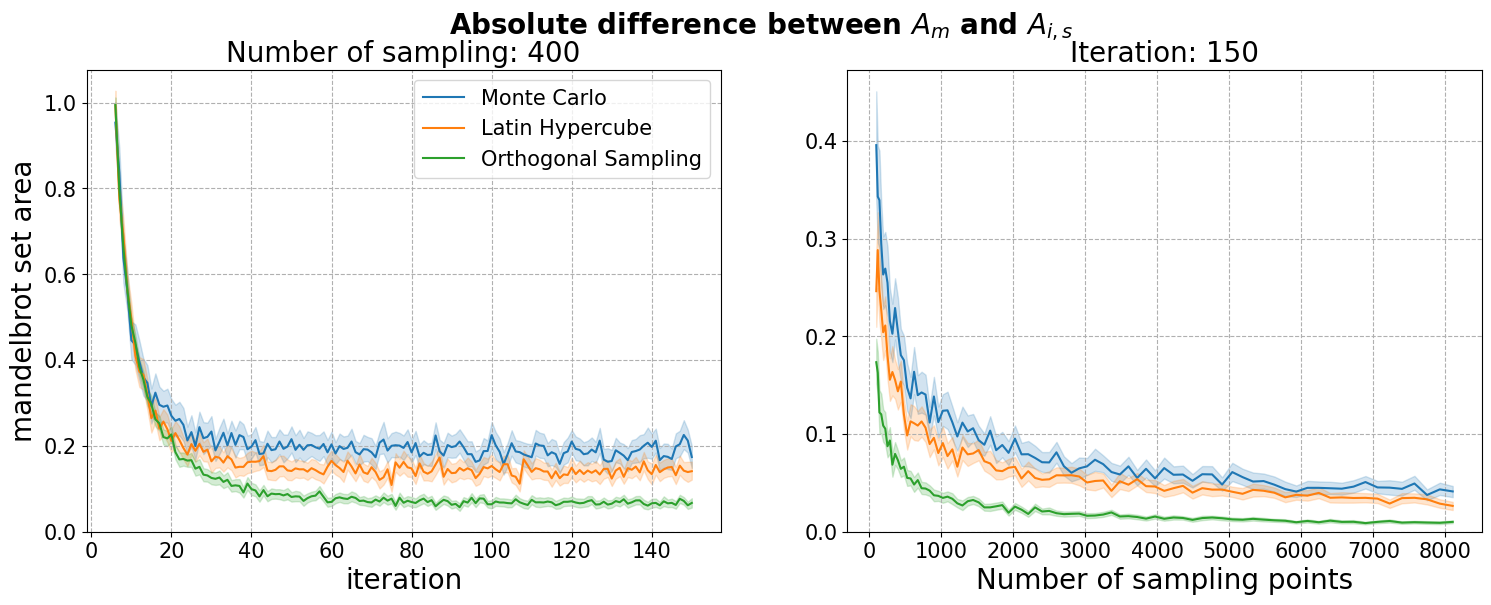

In [7]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig1, ax1 = plt.subplots(1, 2)

sns.lineplot(data=df_s, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[0])
sns.lineplot(data=df_s, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(6, 151), np.repeat([Am], 145), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)

fig1.suptitle(r'Absolute difference between $A_m$ and $A_{i,s}$', fontsize=20, fontweight='bold')

ax1[0].set_title('Number of sampling: 400', fontsize=20)
ax1[0].set_ylim(bottom=0)
ax1[0].set_xlabel('iteration', fontsize=20)
ax1[0].set_ylabel('mandelbrot set area', fontsize=20)
ax1[0].tick_params(axis='both', which='major', labelsize=15)
ax1[0].legend(fontsize=15)
ax1[0].grid(linestyle='--')

ax1[1].set_title('Iteration: 150', fontsize=20)
ax1[1].set_ylim(bottom=0)
ax1[1].set_xlabel('Number of sampling points', fontsize=20)
ax1[1].set_ylabel('')
ax1[1].tick_params(axis='both', which='major', labelsize=15)
ax1[1].get_legend().remove()
ax1[1].grid(linestyle='--')

plt.show()

In [39]:
# '''
# Note the figure in this block is generated with RuntimeWarning handling,
# compared to the figure above, the average area is much larger.
# '''

# plt.rcParams['figure.figsize'] = (18, 6)
# fig1, ax1 = plt.subplots(1, 2)

# sns.lineplot(data=df_i, x='iteration', y='area', hue='s_method', errorbar='ci', ax=ax1[0])
# sns.lineplot(data=df_s, x='num_s', y='area', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(0, 61), np.repeat([Am], 61), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)


# ax1[0].set_title('Mandelbrot set area, num_sampling=100', fontsize=20)
# ax1[0].set_xlabel('iteration', fontsize=15)
# ax1[0].set_ylabel('mandelbrot set area', fontsize=15)
# ax1[0].tick_params(axis='both', which='major', labelsize=15)
# ax1[0].legend(fontsize=15)

# ax1[1].set_title('Mandelbrot set area, iteration=100', fontsize=20)
# ax1[1].set_xlabel('Number of sampling points', fontsize=15)
# ax1[1].set_ylabel('')
# ax1[1].tick_params(axis='both', which='major', labelsize=15)
# ax1[1].get_legend().remove()

# plt.show()

In [71]:
fig1.savefig('i-s experiments.pdf', bbox_inches='tight')

### New sampling method

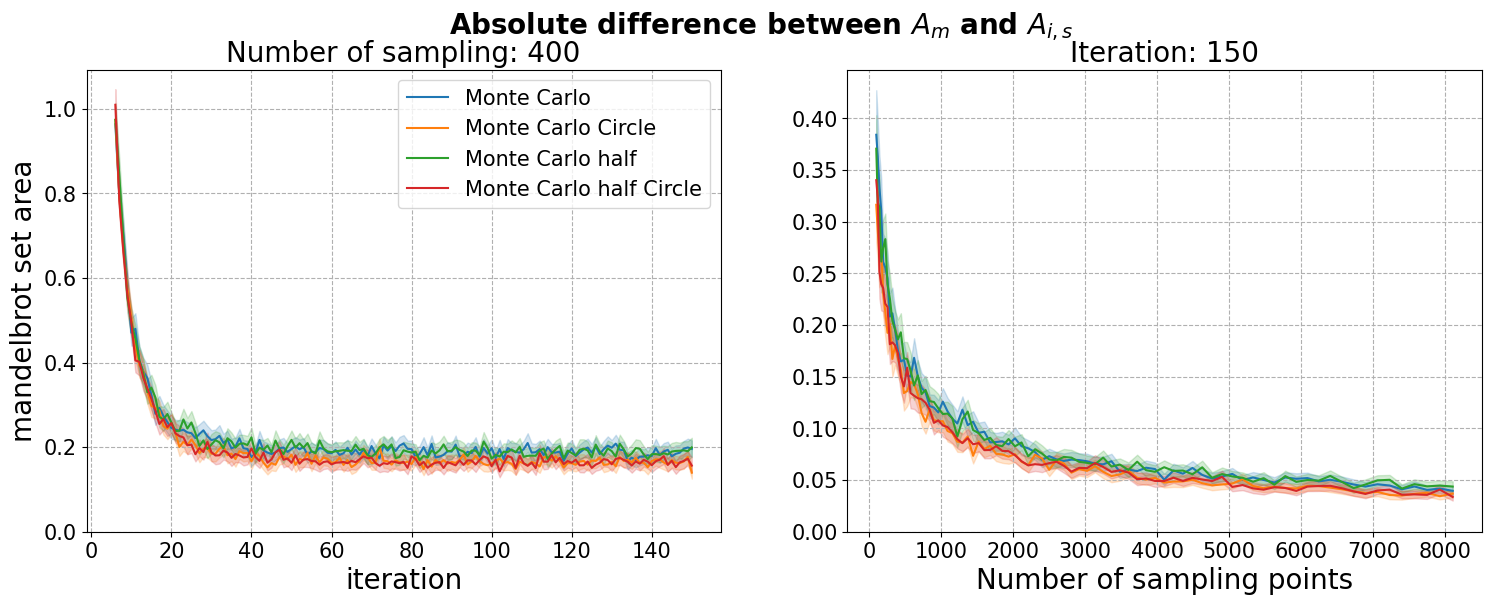

In [94]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig2, ax2 = plt.subplots(1, 2)

sns.lineplot(data=df_i_MC, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[0])
sns.lineplot(data=df_s_MC, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[1])

# ax2[0].plot(np.arange(6, 121), np.repeat([1.506484], 115), 'k-.', label=r'$A_M$', zorder=6)
# ax2[1].plot(np.arange(0, 90**2), np.repeat([1.506484], 90**2), 'k-.', label=r'$A_M$', zorder=4)

fig2.suptitle(r'Absolute difference between $A_m$ and $A_{i,s}$', fontsize=20, fontweight='bold')

ax2[0].set_title('Number of sampling: 400', fontsize=20)
ax2[0].set_ylim(bottom=0)
ax2[0].set_xlabel('iteration', fontsize=20)
ax2[0].set_ylabel('mandelbrot set area', fontsize=20)
ax2[0].tick_params(axis='both', which='major', labelsize=15)
ax2[0].legend(fontsize=15)
ax2[0].grid(linestyle='--')

ax2[1].set_title('Iteration: 150', fontsize=20)
ax2[1].set_ylim(bottom=0)
ax2[1].set_xlabel('Number of sampling points', fontsize=20)
ax2[1].set_ylabel('')
ax2[1].tick_params(axis='both', which='major', labelsize=15)
ax2[1].get_legend().remove()
ax2[1].grid(linestyle='--')

plt.show()

In [70]:
fig2.savefig('circular experiments.pdf', bbox_inches='tight')

### Hypothesis test

In [16]:
from scipy.stats import ttest_ind

In [118]:
'''i-experiments'''
MC = df_i[df_i.s_method == 'Monte Carlo'].groupby(['iteration']).mean()
LHS = df_i[df_i.s_method == 'Latin Hypercube'].groupby(['iteration']).mean()
OS = df_i[df_i.s_method == 'Orthogonal Sampling'].groupby(['iteration']).mean()

print('T-test for MC and LHS is: ', ttest_ind(MC['abs_diff'], LHS['abs_diff']))
print('T-test for MC and OS is: ', ttest_ind(MC['abs_diff'], OS['abs_diff']))
print('T-test for LHS and OS is: ', ttest_ind(LHS['abs_diff'], OS['abs_diff']))

T-test for MC and LHS is:  Ttest_indResult(statistic=3.145015310532651, pvalue=0.0018344361805630956)
T-test for MC and OS is:  Ttest_indResult(statistic=7.367143470057997, pvalue=1.847859898030796e-12)
T-test for LHS and OS is:  Ttest_indResult(statistic=4.333253158965129, pvalue=2.0321219318198684e-05)


In [119]:
'''s-experiments'''
MC = df_s[df_s.s_method == 'Monte Carlo'].groupby(['num_s']).mean()
LHS = df_s[df_s.s_method == 'Latin Hypercube'].groupby(['num_s']).mean()
OS = df_s[df_s.s_method == 'Orthogonal Sampling'].groupby(['num_s']).mean()

print('T-test for MC and LHS is: ', ttest_ind(MC['abs_diff'], LHS['abs_diff']))
print('T-test for MC and OS is: ', ttest_ind(MC['abs_diff'], OS['abs_diff']))
print('T-test for LHS and OS is: ', ttest_ind(LHS['abs_diff'], OS['abs_diff']))

T-test for MC and LHS is:  Ttest_indResult(statistic=2.3371910651878074, pvalue=0.020667980867779406)
T-test for MC and OS is:  Ttest_indResult(statistic=7.4582386729943995, pvalue=5.243641054474732e-12)
T-test for LHS and OS is:  Ttest_indResult(statistic=5.919241568358781, pvalue=1.908395259557986e-08)


In [120]:
'''MC i-experiments'''
MC = df_i_MC[df_i_MC.s_method == 'Monte Carlo'].groupby(['iteration']).mean()
MC_c = df_i_MC[df_i_MC.s_method == 'Monte Carlo Circle'].groupby(['iteration']).mean()
MC_h = df_i_MC[df_i_MC.s_method == 'Monte Carlo half'].groupby(['iteration']).mean()
MC_hc = df_i_MC[df_i_MC.s_method == 'Monte Carlo half Circle'].groupby(['iteration']).mean()

print('T-test for MC and MC circle is: ', ttest_ind(MC['abs_diff'], MC_c['abs_diff']))
print('T-test for MC and MC half is: ', ttest_ind(MC['abs_diff'], MC_h['abs_diff']))
print('T-test for MC and MC half circle is: ', ttest_ind(MC['abs_diff'], MC_hc['abs_diff']))

T-test for MC and MC circle is:  Ttest_indResult(statistic=1.773820124998847, pvalue=0.07714950715689356)
T-test for MC and MC half is:  Ttest_indResult(statistic=-0.1364944546314523, pvalue=0.8915257715395472)
T-test for MC and MC half circle is:  Ttest_indResult(statistic=1.66114067693695, pvalue=0.0977733677410824)


In [121]:
'''MC s-experiments'''
MC = df_s_MC[df_s_MC.s_method == 'Monte Carlo'].groupby(['num_s']).mean()
MC_c = df_s_MC[df_s_MC.s_method == 'Monte Carlo Circle'].groupby(['num_s']).mean()
MC_h = df_s_MC[df_s_MC.s_method == 'Monte Carlo half'].groupby(['num_s']).mean()
MC_hc = df_s_MC[df_s_MC.s_method == 'Monte Carlo half Circle'].groupby(['num_s']).mean()

print('T-test for MC and MC circle is: ', ttest_ind(MC['abs_diff'], MC_c['abs_diff']))
print('T-test for MC and MC half is: ', ttest_ind(MC['abs_diff'], MC_h['abs_diff']))
print('T-test for MC and MC half circle is: ', ttest_ind(MC['abs_diff'], MC_hc['abs_diff']))

T-test for MC and MC circle is:  Ttest_indResult(statistic=1.1720751000059166, pvalue=0.2429091702671892)
T-test for MC and MC half is:  Ttest_indResult(statistic=-0.06440762850978674, pvalue=0.9487260551185686)
T-test for MC and MC half circle is:  Ttest_indResult(statistic=1.2527265005851027, pvalue=0.212133079688032)
